# Boston Housing Price Prediction

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from linear_regression_from_scratch import LinearRegression as LR_from_scratch
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

## Data Preprocessing

In [3]:
# Import data
dataset = pd.read_csv("../datasets/BostonHousing.csv")
dataset.head()
# MEDV: Median value of owner-occupied homes in $1000's

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
dataset.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


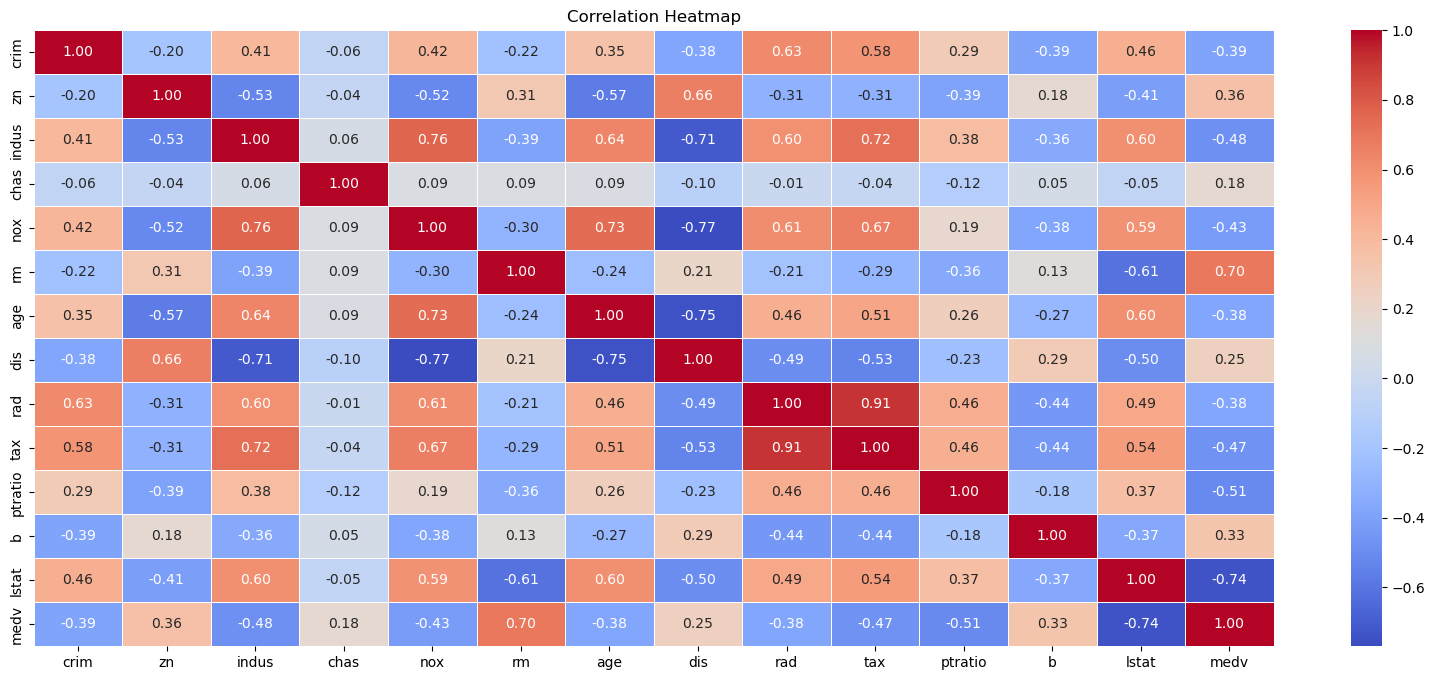

In [ ]:
# Correlation heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(dataset.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5) 
plt.title("Correlation Heatmap", fontsize=20)
plt.show()

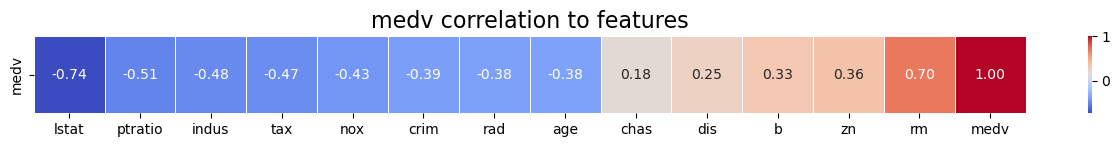

In [24]:
# Correlation for "medv"
medv_corr = pd.DataFrame(dataset.corr()['medv'].sort_values(ascending=True))
plt.figure(figsize=(16, 1))
sns.heatmap(medv_corr.T, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5) 
plt.title("medv correlation to features", fontsize=16)
plt.show()

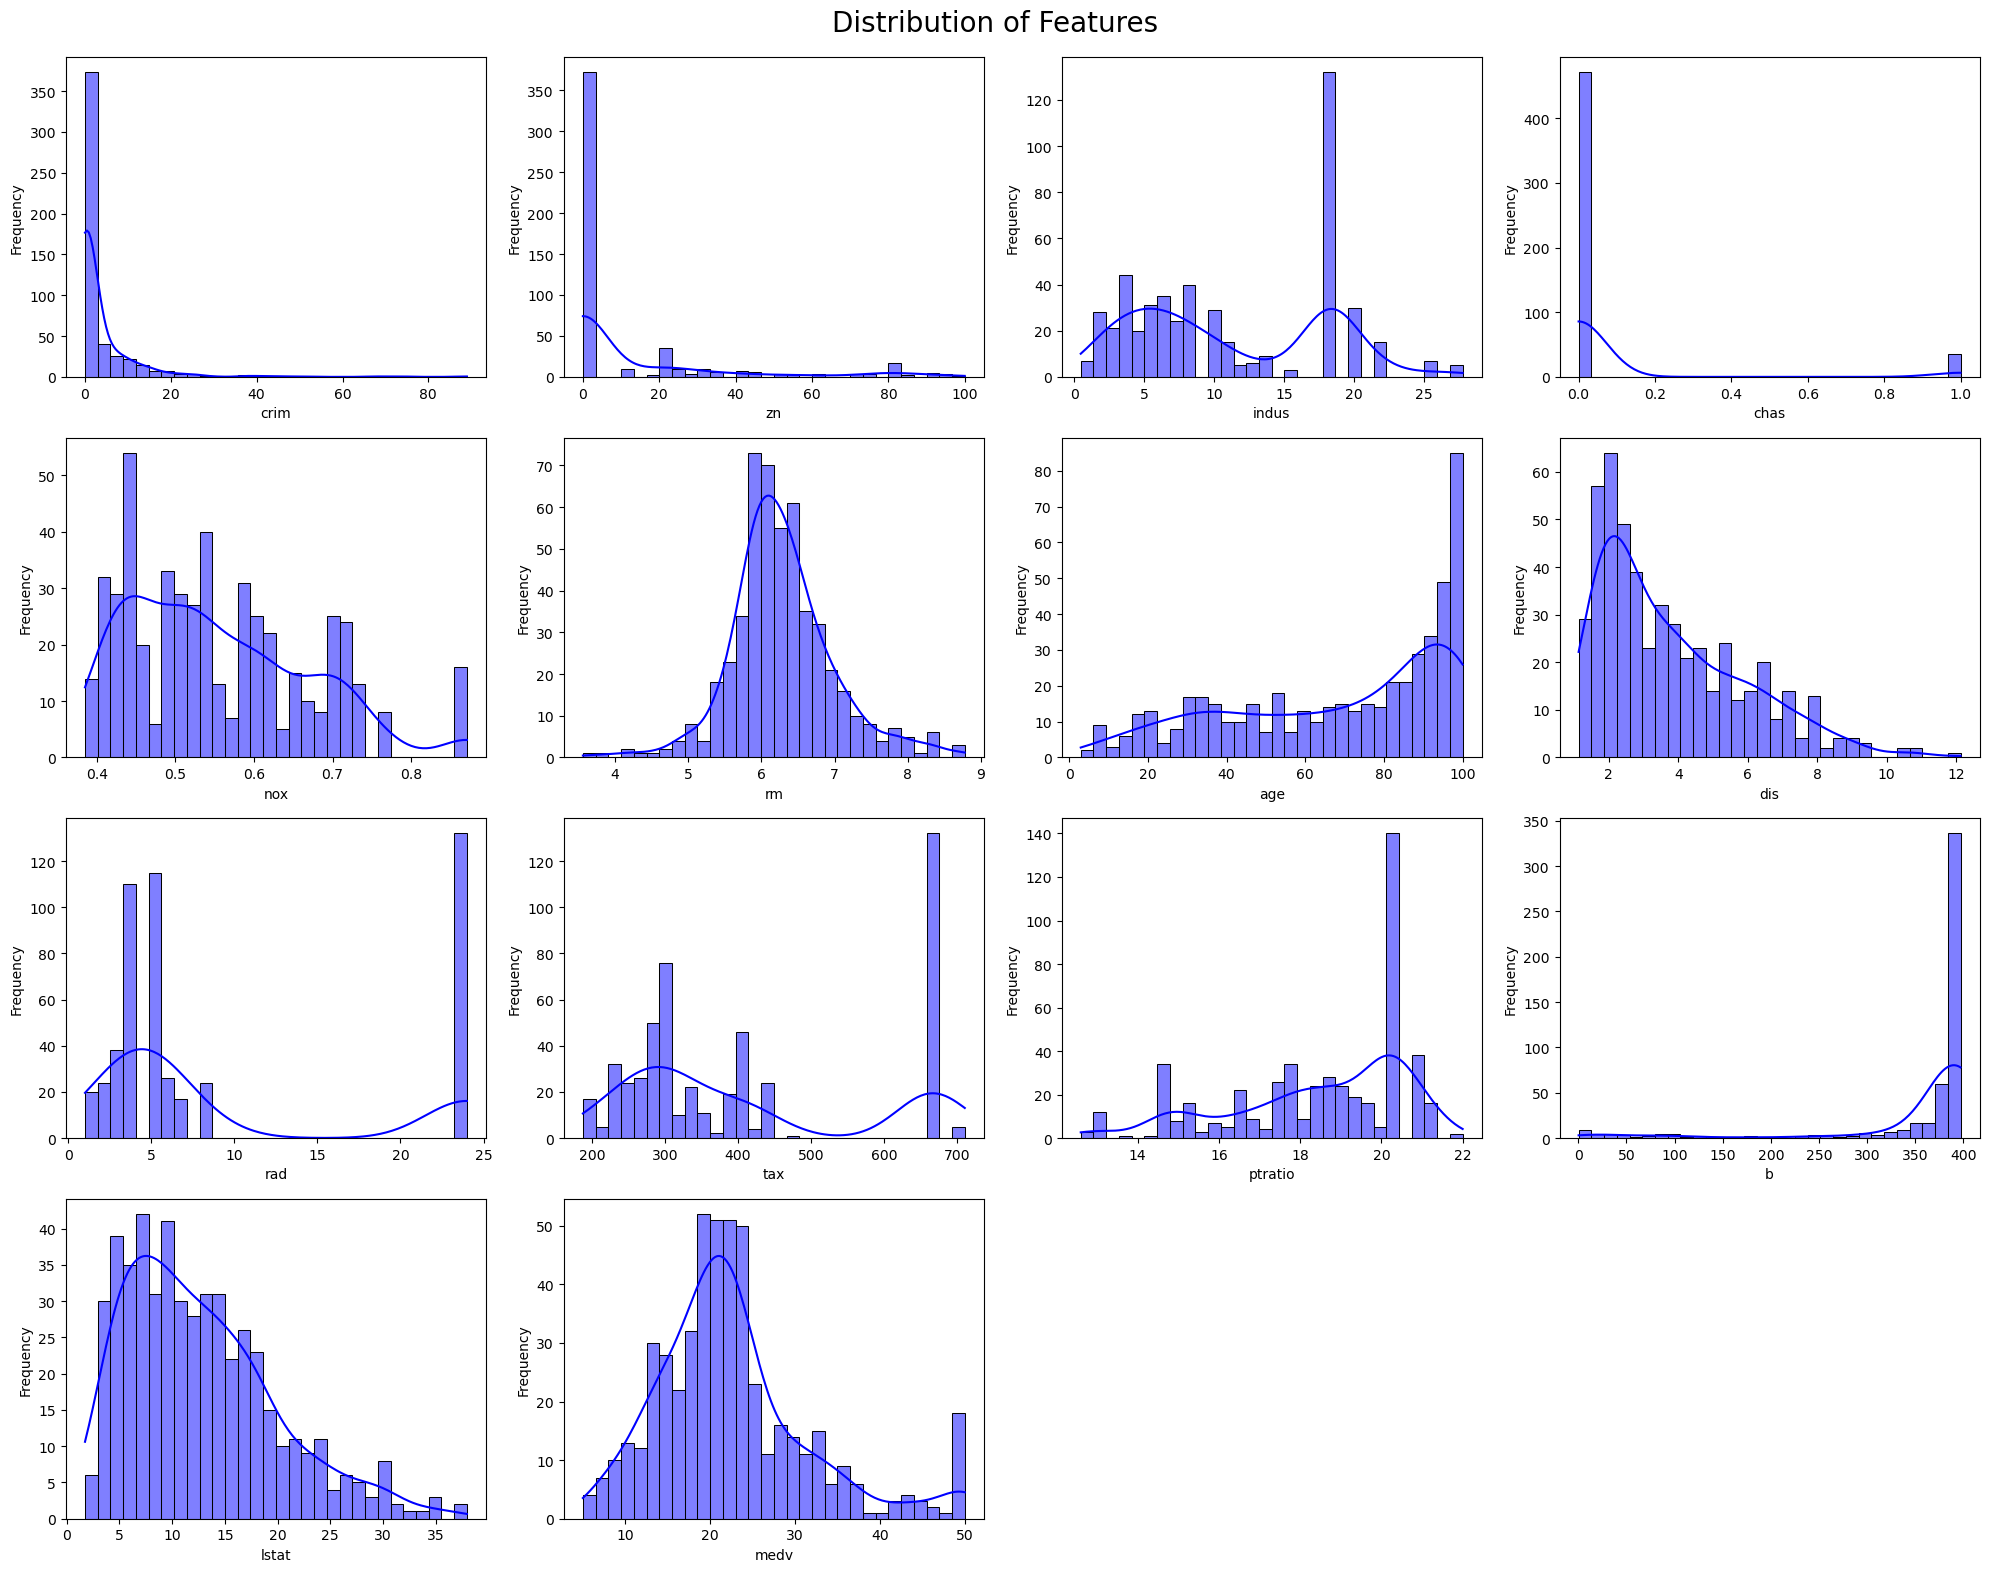

In [23]:
# Distribution of each feature 
num_features = dataset.columns
fig, axes = plt.subplots(nrows=len(num_features)//4 + 1, ncols=4, figsize=(20, 16))
axes = axes.flatten()
for i, feature in enumerate(num_features):
    sns.histplot(dataset[feature], kde=True, bins=30, color='blue', ax=axes[i])
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Frequency")
for j in range(i + 1, len(axes)):
    axes[j].axis('off')
fig.suptitle("Distribution of Features", fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

In [9]:
# Extract features and targets
Y = np.array(dataset.medv)
X = np.array(dataset.drop(columns=['medv']))
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [10]:
# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Mode Training & Evaluation

In [11]:
# Dictionary of models to train
models = {
    "Linear Regression (Scratch)": LR_from_scratch(learning_rate=0.01, iterations=1000),
    "Linear Regression (Sklearn)": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "ElasticNet Regression": ElasticNet(alpha=0.1, l1_ratio=0.5),
}

In [12]:
# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    
    # Compute performance metrics
    mse = mean_squared_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)
    results[name] = {"MSE": mse, "R2": r2}

    print(f"\n{name}:")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R2 Score: {r2:.2f}")


Linear Regression (Scratch):
Mean Squared Error (MSE): 24.69
R2 Score: 0.66

Linear Regression (Sklearn):
Mean Squared Error (MSE): 24.29
R2 Score: 0.67

Ridge Regression:
Mean Squared Error (MSE): 24.31
R2 Score: 0.67

Lasso Regression:
Mean Squared Error (MSE): 25.66
R2 Score: 0.65

ElasticNet Regression:
Mean Squared Error (MSE): 25.20
R2 Score: 0.66


In [13]:
# Compare model performance
print("\nModel Performance Comparison:")
performance_df = pd.DataFrame(results).T
print(performance_df)


Model Performance Comparison:
                                   MSE        R2
Linear Regression (Scratch)  24.691182  0.663304
Linear Regression (Sklearn)  24.291119  0.668759
Ridge Regression             24.312904  0.668462
Lasso Regression             25.656739  0.650138
ElasticNet Regression        25.203553  0.656317



Best Model: Linear Regression (Sklearn)


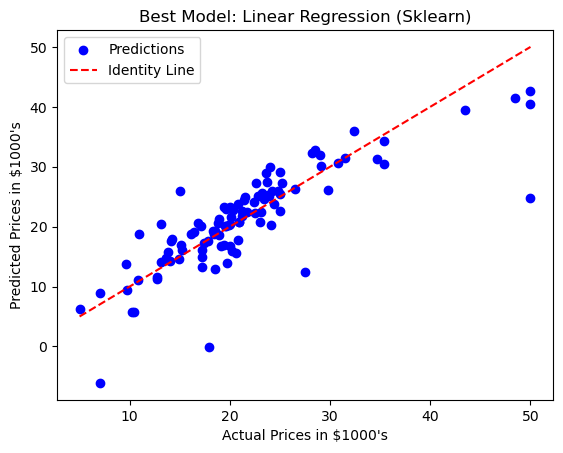

In [14]:
# Visualization of predictions for the best model (based on R2 score)
best_model_name = performance_df.R2.idxmax()
print(f"\nBest Model: {best_model_name}")

best_model = models[best_model_name]
best_pred = best_model.predict(X_test)

plt.scatter(Y_test, best_pred, color='blue', label='Predictions')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--', label='Identity Line')
plt.xlabel("Actual Prices in $1000's")
plt.ylabel("Predicted Prices in $1000's")
plt.title(f"Best Model: {best_model_name}")
plt.legend()
plt.show()